### Question 3: Conditon and grade effect on price?


Seeing that age alone was not a great indicator of price. Let's examine age's relationship to home conditon and grade. Is the condition or grade of a home a good indicator of price?

Ranking data provided by King County appraisers website.



In [34]:
import folium
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import json
import numpy as np

In [94]:
df = pd.read_csv("./data/kc_house_data_cleaned.csv").drop('Unnamed: 0', axis=1)
zips_df = pd.read_csv("./data/zipcode_averages.csv")

### Condition

How good the condition is ( Overall )

    1 = Poor- Worn out
    2 = Fair- Badly worn
    3 = Average
    4 = Good
    5 = Very Good

Text(0.5, 0, 'Age (Years)')

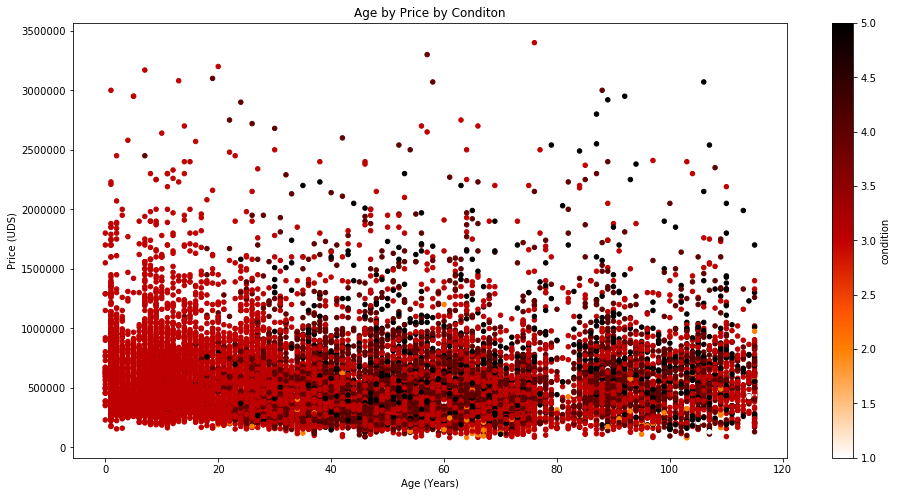

In [82]:
df.plot(kind="scatter", x="age", y="price", figsize=(16, 8), c="condition", 
             cmap="gist_heat_r", colorbar=True, sharex=False);
plt.title('Age by Price by Conditon')
plt.ylabel('Price (UDS)')
plt.xlabel('Age (Years)')

Though subtle, a gradient is showing the older homes in this dataset are often well maintained and continue with condition ranking of above average. The newer homes (20 years old or newer) surprising show mostly average ratings. This could be due to many factors no observable in this data: such as newer, faster construction that cuts corners on some more durable qualities and thus only holds up to 'average' condition. People with older homes may place greater value on maintaining the historical properties of the home, thus maintaining over conditon for longer. As far as conditions effect on price, there is an sporadic distribution of condition and price. Condition combined with age may not be a sufficient predictor of price.

### How does condition relate to price?

Text(0, 0.5, 'Average Price')

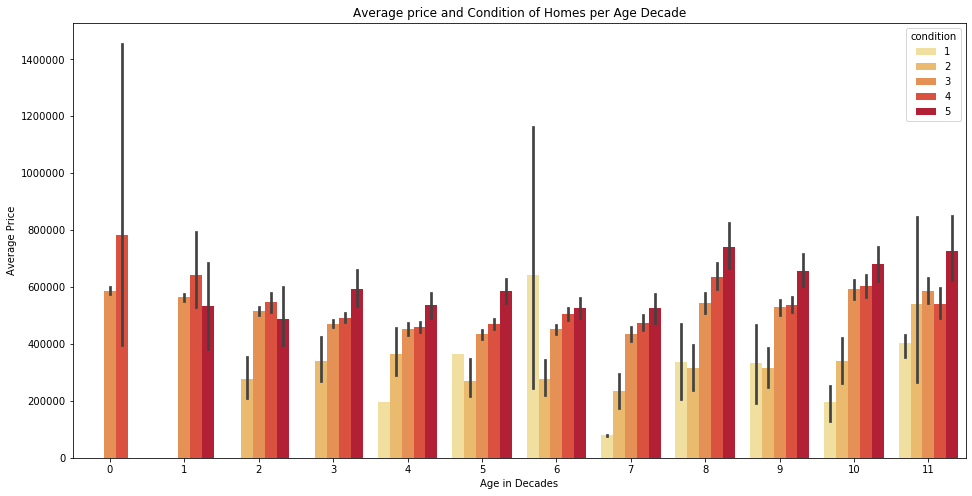

In [91]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(x='age_decade', y='price', hue='condition', data=df, palette="YlOrRd");
plt.title('Average price and Condition of Homes per Age Decade')
plt.xlabel('Age in Decades')
plt.ylabel('Average Price')

This chart allows an easier visual of the lower condtion homes increasing after about 20 years of age. While the average number of 'Very Good' homes stays somewhat similar across all age brackets. Lower condition homes are shown to typically sell for lower prices. Again we see the newest home are heavily weight towards 'average' or 'above average'.

### Grade
    
    1-3 = Falls short of minimum building standards. Normally cabin or inferior structure.

    4 = Generally older, low quality construction. Does not meet code.

    5 = Low construction costs and workmanship. Small, simple design.

    6 = Lowest grade currently meeting building code. Low quality materials and simple designs.

    7 = Average grade of construction and design. Commonly seen in plats and older sub-divisions.

    8 = Just above average in construction and design. Usually better materials. 

    9 = Better architectural design with extra interior and exterior design and quality.

    10 = Homes of this quality generally have high quality features. 

    11 = Custom design and higher quality finish work with added amenities. 

    12 = Custom design and excellent builders. All materials are of the highest quality.

    13 = Generally custom designed and built. Mansion level.

### How does home age relate to grade score?

Text(0.5, 0, 'Age (Years)')

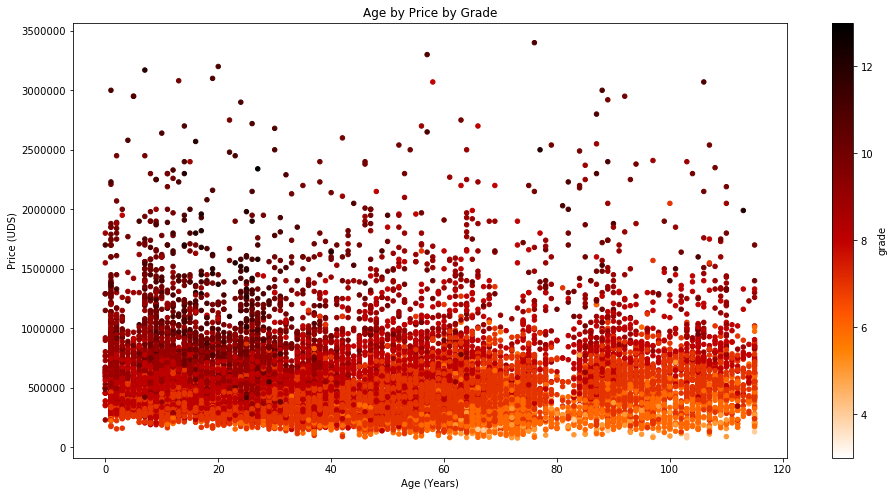

In [95]:
df.plot(kind="scatter", x="age", y="price", figsize=(16, 8), c="grade", 
             cmap="gist_heat_r", colorbar=True, sharex=False);
plt.title('Age by Price by Grade')
plt.ylabel('Price (UDS)')
plt.xlabel('Age (Years)')

Here we can see that newer homes are being being graded higher in ammenities than the average older home. Lower graded homes sell for less. Home Grade seems to have an effect on price worth investigating.

Text(0.5, 1.0, 'Home Grade to Price')

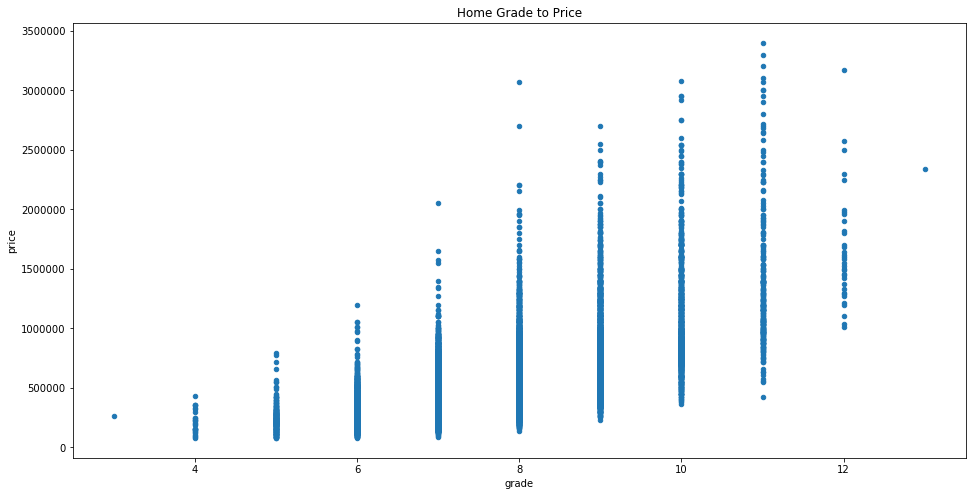

In [102]:
df.plot(kind="scatter", x="grade", y="price", figsize=(16, 8), sharex=False);
plt.title('Home Grade to Price')

A subtle linear trend is observed. House grade may be a useful feature in our linear model.

### Renovation Effect: how to improve grade and condition?

Let's examine the effects of a major renovation on improving these scores. 

    0 = No major renovations recorded
    1 = Has had at least one major renovation

Text(0.5, 0, 'Age in Decades')

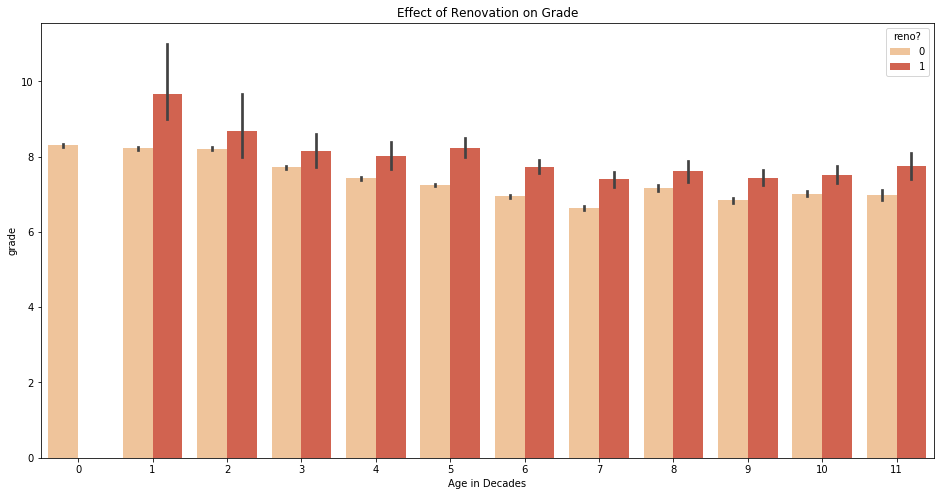

In [109]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(x='age_decade', y='grade', hue='reno?', data=df, palette="OrRd");
plt.title("Effect of Renovation on Grade")
plt.xlabel('Age in Decades')

Renovation does slightly improve grade score. Not all improvements are beyond error assumptions. How do these renovations effect price?

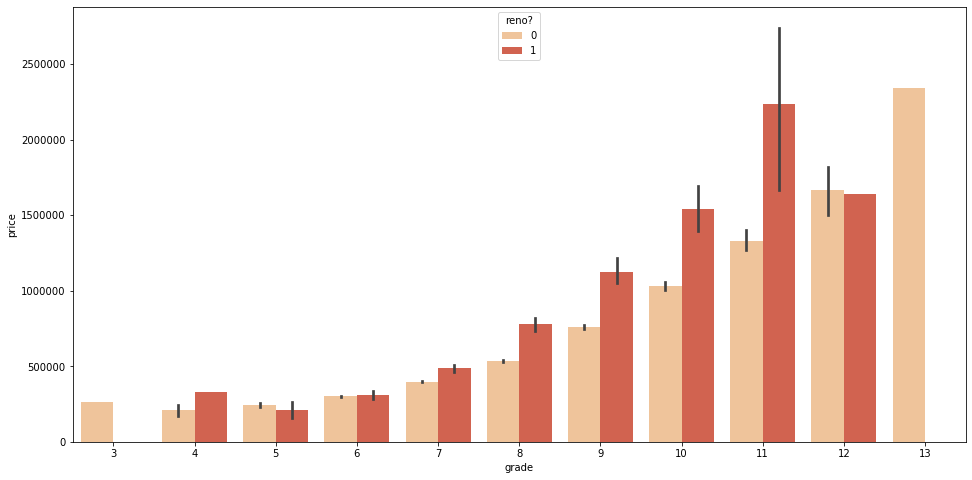

In [108]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(x='grade', y='price', hue='reno?', data=df, palette="OrRd");

Renovating a home can potentially increase the selling price compared to similarly graded homes. Grade 13 shows only unrenovated homes, perhaps this are newer, most advanced homes.

### Conclusion/Reccomendation